In [91]:
import numpy as np
import pandas as pd
import re
import mapply
# set mapply
mapply.init(n_workers=-1, progressbar=True)

import nltk
nltk.download('punkt')
import string
from nltk.corpus import stopwords
import json

[nltk_data] Downloading package punkt to /home/claudia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [92]:
# Read the dataset
lyrics = pd.read_csv('lyrics.csv')
lyrics

,id,title,artist,lyrics,tag
0,7,Lollipop Remix,Lil Wayne,[Intro: Lil Wayne]\nHaha\nUh-huh\nNo homo (You...,rap
1,19,Losing Weight Pt. 2,Cam'ron,"[Chorus: Cam'ron]\nAyo, fuck losing weight\nI'...",rap
2,26,A Milli,Fabolous,It's time to get money\nI got a million reason...,rap
3,29,Warning,The Notorious B.I.G.,[Produced by Easy Mo Bee]\n\n[Verse 1: The Not...,rap
4,40,On My Own,Lil Wayne,"[Intro: Lil Wayne]\nYeah, hit me with the snar...",rap
...,...,...,...,...,...
84211,7864996,SUHO - Grey Suit English Translation,Genius English Translations,"[Verse 1]\nI feel faded, I'm not used to this ...",rock
84212,7865871,HEARTFIRST,Kelsea Ballerini,[Verse 1]\nMet him at a party\nAccidentally br...,country
84213,7868429,Never Had a Chance,Katherine Li,[Chorus]\nWhy am I still here and waiting for ...,pop
84214,7871730,Red Alert Boss Metal Zone,Clutch,[Verse 1]\nI used to work for Doc Tyrell\nIt d...,rock


In [93]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84216 entries, 0 to 84215
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      84216 non-null  int64 
 1   title   84213 non-null  object
 2   artist  84216 non-null  object
 3   lyrics  84216 non-null  object
 4   tag     84216 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.2+ MB


In [94]:
# Check for missing values
lyrics.isna().sum()

id        0
title     3
artist    0
lyrics    0
tag       0
dtype: int64

In [95]:
# Drop rows with missing values
lyrics = lyrics.dropna(subset='title')
lyrics.isna().sum()

id        0
title     0
artist    0
lyrics    0
tag       0
dtype: int64

In [96]:
for tag in lyrics['tag'].unique():
    tag_perc = len(lyrics[lyrics['tag'] == tag]) / len(lyrics)
    print(f'{tag}: {tag_perc: .1f}')

rap:  0.2
rb:  0.2
pop:  0.2
misc:  0.2
rock:  0.2
country:  0.2


In [97]:
# Lyrics contain meta information between square brackets
print(lyrics['lyrics'][0])

[Intro: Lil Wayne]
Haha
Uh-huh
No homo (Young Mula, baby!)
I say, he's so sweet, make her wanna lick the wrapper
Remix, baby!

[Verse 1: Kanye West]
Lollipop, lollipop, breastses just like Dolly Parton
She ride my spaceship 'til she hit the top
That hit the spot
'Til she ask, "How many li-i-li-i-licks do it take" 'til she get to shop?
Don't worry why my wrists got so freeze
Tell a girl, "Like Doritos, that's not 'cho cheese"
Tell her friends, "Like Fritos, I'm tryin' to lay"
I can't only have one, and I ain't trying to wait
This a song with Wayne, so you know it's gon' melt
But you ain't finna murder me like everybody else
I'ma rap like I got some type respect for myself
I don't do it for my health, man, I do it for the belt
Man, I do it to the death, 'til the roof get melt
Hundred degrees, drop the roof, so the coupe don't melt
Man, the flow so cold, chicken soup won't help
We need four more hoes, we need oh, oh, oh, oh!
You know what it is when we out of town
We balling too serious, 

In [98]:
# Clean lyrics (remove content btw square brackets)
del_sqbrackets = re.compile(r'\[.*?\]')
lyrics['cleaned_lyrics'] = lyrics['lyrics'].mapply(lambda x: del_sqbrackets.sub('', x))
lyrics = lyrics.drop(columns=['lyrics'])
lyrics = lyrics.rename(columns={'cleaned_lyrics': 'lyrics'})
print(lyrics['lyrics'][0])

100%|██████████| 40/40 [00:02<00:00, 15.95it/s]



Haha
Uh-huh
No homo (Young Mula, baby!)
I say, he's so sweet, make her wanna lick the wrapper
Remix, baby!


Lollipop, lollipop, breastses just like Dolly Parton
She ride my spaceship 'til she hit the top
That hit the spot
'Til she ask, "How many li-i-li-i-licks do it take" 'til she get to shop?
Don't worry why my wrists got so freeze
Tell a girl, "Like Doritos, that's not 'cho cheese"
Tell her friends, "Like Fritos, I'm tryin' to lay"
I can't only have one, and I ain't trying to wait
This a song with Wayne, so you know it's gon' melt
But you ain't finna murder me like everybody else
I'ma rap like I got some type respect for myself
I don't do it for my health, man, I do it for the belt
Man, I do it to the death, 'til the roof get melt
Hundred degrees, drop the roof, so the coupe don't melt
Man, the flow so cold, chicken soup won't help
We need four more hoes, we need oh, oh, oh, oh!
You know what it is when we out of town
We balling too serious, and you out of bounds
So come here, bab

/tmp/ipykernel_76362/3727505202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics['cleaned_lyrics'] = lyrics['lyrics'].mapply(lambda x: del_sqbrackets.sub('', x))


In [99]:
# misc lyrics category contain unexpected items
misc_lyrics = lyrics[lyrics['tag'] == 'misc']
misc_lyrics['title'].to_list()

['Penny for a Thought',
 'John 1',
 'John 3',
 'Im Nobody Who Are You?',
 'Buffalo Bills',
 'Do Not Go Gentle Into That Good Night',
 'The Second Coming',
 'Ego-Tripping there may be a reason',
 'The Animal Soul',
 'The Love Song of J. Alfred Prufrock',
 'Kubla Khan',
 'Mending Wall',
 'The Mower Against The Gardens',
 'The Road Not Taken',
 'The Tyger',
 'The Lamb',
 'Singing In The Rain',
 'Andak Andak',
 'Genesis 1',
 'Ecclesiastes 1',
 'Sonnet 18',
 'Baba Says Cool for Thought',
 'Stopping by Woods on a Snowy Evening',
 'Who Will Survive America',
 'Comment 1',
 'Nicki Minaj',
 'The Emperor of Ice Cream',
 'He Wishes for the Cloths of Heaven',
 'Introduction / The Revolution Will Not Be Televised Small Talk at 125th and Lenox Version',
 'The Bill of Rights',
 'Jabberwocky',
 'And Did Those Feet In Ancient Time',
 'The Rime Of The Ancient Mariner',
 'Psalm 23',
 'Matthew 25',
 'Is This Really What You Want?',
 'To His Coy Mistress',
 'Revelation 1',
 'I Have a Dream',
 'Mentos Theme

In [100]:
print('Examples:\n')
print('\n2012 Presidential Acceptance Speech----------------------------')
print(misc_lyrics[misc_lyrics['title'] == '2012 Presidential Acceptance Speech']['lyrics'].item()[0:800])
print('\nTreaty of Versailles Articles 231 - 247----------------------------')
print(misc_lyrics[misc_lyrics['title'] == 'Treaty of Versailles Articles 231 - 247']['lyrics'].item()[0:800])
print('\nHansel and Gretel----------------------------')
print(misc_lyrics[misc_lyrics['title'] == 'Hansel and Gretel']['lyrics'].item()[0:800])
print('\nThe Picture of Dorian Gray Preface----------------------------')
print(misc_lyrics[misc_lyrics['title'] == 'The Picture of Dorian Gray Preface']['lyrics'].item()[0:800])

Examples:


2012 Presidential Acceptance Speech----------------------------
Thank you so much. Tonight, more than 200 years after a former colony won the right to determine its own destiny, the task of perfecting our union moves forward. It moves forward because of you. It moves forward because you reaffirmed the spirit that has triumphed over war and depression, the spirit that has lifted this country from the depths of despair to the great heights of hope, the belief that while each of us will pursue our own individual dreams, we are an American family and we rise or fall together as one nation and as one people.

Tonight, in this election, you, the American people, reminded us that while our road has been hard, while our journey has been long, we have picked ourselves up, we have fought our way back, and we know in our hearts that for the United States of Ameri

Treaty of Versailles Articles 231 - 247----------------------------
Reparations

PART VIII

SECTION I

GENERAL PROVISIONS


In [101]:
# Drop all rows with the 'misc' tag
lyrics = lyrics.loc[lyrics['tag'] != 'misc']
lyrics

,id,title,artist,tag,lyrics
0,7,Lollipop Remix,Lil Wayne,rap,"\nHaha\nUh-huh\nNo homo (Young Mula, baby!)\nI..."
1,19,Losing Weight Pt. 2,Cam'ron,rap,"\nAyo, fuck losing weight\nI'm back on these h..."
2,26,A Milli,Fabolous,rap,It's time to get money\nI got a million reason...
3,29,Warning,The Notorious B.I.G.,rap,"\n\n\nWho the fuck is this, pagin' me at 5:46 ..."
4,40,On My Own,Lil Wayne,rap,"\nYeah, hit me with the snares, Fresh\nYeah-ye..."
...,...,...,...,...,...
84211,7864996,SUHO - Grey Suit English Translation,Genius English Translations,rock,"\nI feel faded, I'm not used to this new color..."
84212,7865871,HEARTFIRST,Kelsea Ballerini,country,\nMet him at a party\nAccidentally brushed his...
84213,7868429,Never Had a Chance,Katherine Li,pop,\nWhy am I still here and waiting for us to ha...
84214,7871730,Red Alert Boss Metal Zone,Clutch,rock,\nI used to work for Doc Tyrell\nIt didn't end...


In [102]:
lyrics.drop_duplicates()

,id,title,artist,tag,lyrics
0,7,Lollipop Remix,Lil Wayne,rap,"\nHaha\nUh-huh\nNo homo (Young Mula, baby!)\nI..."
1,19,Losing Weight Pt. 2,Cam'ron,rap,"\nAyo, fuck losing weight\nI'm back on these h..."
2,26,A Milli,Fabolous,rap,It's time to get money\nI got a million reason...
3,29,Warning,The Notorious B.I.G.,rap,"\n\n\nWho the fuck is this, pagin' me at 5:46 ..."
4,40,On My Own,Lil Wayne,rap,"\nYeah, hit me with the snares, Fresh\nYeah-ye..."
...,...,...,...,...,...
84211,7864996,SUHO - Grey Suit English Translation,Genius English Translations,rock,"\nI feel faded, I'm not used to this new color..."
84212,7865871,HEARTFIRST,Kelsea Ballerini,country,\nMet him at a party\nAccidentally brushed his...
84213,7868429,Never Had a Chance,Katherine Li,pop,\nWhy am I still here and waiting for us to ha...
84214,7871730,Red Alert Boss Metal Zone,Clutch,rock,\nI used to work for Doc Tyrell\nIt didn't end...


In [103]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70178 entries, 0 to 84215
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      70178 non-null  int64 
 1   title   70178 non-null  object
 2   artist  70178 non-null  object
 3   tag     70178 non-null  object
 4   lyrics  70178 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.2+ MB


In [104]:
# Save the cleaned dataset
lyrics.to_csv('cleaned_lyrics.csv', index=False)

## Data analysis

In [ ]:
lyrics = pd.read_csv('cleaned_lyrics.csv')
lyrics['length'] = lyrics['lyrics'].mapply(lambda x: len(x))

In [ ]:
mean_lengths = []
max_lengths = []
min_lengths = []

for tag in lyrics['tag'].unique():
    tag_lengths = lyrics[lyrics['tag'] == tag]['length']

    mean_len = tag_lengths.mean()
    max_len = tag_lengths.max()
    min_len = tag_lengths.min()
    
    mean_lengths.append(mean_len)
    max_lengths.append(max_len)
    min_lengths.append(min_len)

    print(f'{tag} -----------------------------------')
    print(f'mean length: {mean_len}\nmax length: {max_len}\nmin length: {min_len}')

rock -----------------------------------
mean length: 1190.5120769504808
max length: 12661
min length: 101
pop -----------------------------------
mean length: 1361.075591336563
max length: 46201
min length: 100
rb -----------------------------------
mean length: 1654.6956893480585
max length: 73878
min length: 101
country -----------------------------------
mean length: 1295.5785836420632
max length: 16283
min length: 100
rap -----------------------------------
mean length: 2673.737674551154
max length: 79626
min length: 112


In [ ]:
lyrics['tokens'] = lyrics['lyrics'].mapply(lambda x: nltk.word_tokenize(x))
lyrics['n_tokens'] = lyrics['tokens'].mapply(lambda x: len(x))

mean_lengths = []
max_lengths = []
min_lengths = []

for tag in lyrics['tag'].unique():
    tag_lengths = lyrics[lyrics['tag'] == tag]['n_tokens']

    mean_len = tag_lengths.mean()
    max_len = tag_lengths.max()
    min_len = tag_lengths.min()

    mean_lengths.append(mean_len)
    max_lengths.append(max_len)
    min_lengths.append(min_len)

    print(f'{tag} -----------------------------------')
    print(f'mean length: {mean_len}\nmax length: {max_len}\nmin length: {min_len}')

100%|██████████| 40/40 [01:15<00:00,  1.88s/it]


rock -----------------------------------
mean length: 267.00263626647666
max length: 2881
min length: 20
pop -----------------------------------
mean length: 315.6692077514962
max length: 7787
min length: 18
rb -----------------------------------
mean length: 402.37691485571787
max length: 18087
min length: 21
country -----------------------------------
mean length: 294.30443146195495
max length: 3674
min length: 24
rap -----------------------------------
mean length: 627.5619834710744
max length: 16129
min length: 24


In [ ]:
# Load English stopwords
stop_words = set(stopwords.words('english'))

def process_tokens(tokens):
    tokens = [token.lower() for token in tokens]  # Convert tokens to lowercase
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    tokens = [''.join(char for char in token if char not in string.punctuation) for token in tokens]  # Remove punctuation
    tokens = [token for token in tokens if token.strip() != ""]  # Remove empty tokens
    return tokens

lyrics['filtered_tokens'] = lyrics['tokens'].mapply(process_tokens)

100%|██████████| 40/40 [01:28<00:00,  2.20s/it]


In [ ]:
lyrics['filtered_tokens']

0        [could, hold, hold, icecaps, melting, transist...
1        [nothing, could, ask, nothing, need, world, ba...
2        [gon, pop, xanny, brown, skin, fatty, dasani, ...
3        [heroes, gone, come, great, land, america, sti...
4        [cheated, lied, said, love, cheated, lied, sai...
                               ...                        
70173    [another, song, reasons, stressed, melody, get...
70174    [yeah, people, rapper, right, could, ever, var...
70175    [hollygrove, go, hollywood, uhh, hollygrove, h...
70176    [seen, men, look, think, see, like, think, mak...
70177    [lay, awake, night, oh, low, troubled, get, jo...
Name: filtered_tokens, Length: 70178, dtype: object

In [ ]:
lyrics['n_filtered_tokens'] = lyrics['filtered_tokens'].mapply(lambda x: len(x))

mean_lengths = []
max_lengths = []
min_lengths = []

for tag in lyrics['tag'].unique():
    tag_lengths = lyrics[lyrics['tag'] == tag]['n_filtered_tokens']

    mean_len = tag_lengths.mean()
    max_len = tag_lengths.max()
    min_len = tag_lengths.min()

    mean_lengths.append(mean_len)
    max_lengths.append(max_len)
    min_lengths.append(min_len)

    print(f'{tag} -----------------------------------')
    print(f'mean length: {mean_len}\nmax length: {max_len}\nmin length: {min_len}')

100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


rock -----------------------------------
mean length: 112.55311720698255
max length: 1230
min length: 6
pop -----------------------------------
mean length: 130.9160729552579
max length: 3914
min length: 6
rb -----------------------------------
mean length: 161.3851086569291
max length: 7009
min length: 4
country -----------------------------------
mean length: 125.64826161299516
max length: 1577
min length: 5
rap -----------------------------------
mean length: 275.18509546879454
max length: 7051
min length: 8


In [ ]:
lyrics['filtered_unique_tokens'] = lyrics['filtered_tokens'].mapply(lambda x: list(set(x)))

100%|██████████| 40/40 [00:39<00:00,  1.02it/s]


In [ ]:
lyrics['filtered_unique_tokens']

0        [lost, want, window, could, little, burning, p...
1        [could, say, jesa, hard, asked, beliya, seen, ...
2        [trust, go, want, us, always, brown, neck, sit...
3        [last, fair, nontax, want, land, read, us, put...
4        [oh, keep, nothing, lied, try, somethng, cheat...
                               ...                        
70173    [last, light, go, lead, want, song, reason, ca...
70174    [diaper, uh, go, want, respect, could, putting...
70175    [hahahaha, pt, go, range, gun, californicate, ...
70176    [look, drinkin, friend, tell, single, actin, h...
70177    [oh, generation, even, decent, go, lie, baby, ...
Name: filtered_unique_tokens, Length: 70178, dtype: object

In [ ]:
lyrics['n_filtered_unique_tokens'] = lyrics['filtered_unique_tokens'].mapply(lambda x: len(x))

mean_lengths = []
max_lengths = []
min_lengths = []

for tag in lyrics['tag'].unique():
    tag_lengths = lyrics[lyrics['tag'] == tag]['n_filtered_unique_tokens']

    mean_len = tag_lengths.mean()
    max_len = tag_lengths.max()
    min_len = tag_lengths.min()

    mean_lengths.append(mean_len)
    max_lengths.append(max_len)
    min_lengths.append(min_len)

    print(f'{tag} -----------------------------------')
    print(f'mean length: {mean_len}\nmax length: {max_len}\nmin length: {min_len}')

100%|██████████| 40/40 [00:19<00:00,  2.09it/s]


rock -----------------------------------
mean length: 59.746704666904165
max length: 498
min length: 2
pop -----------------------------------
mean length: 60.81575947563408
max length: 1594
min length: 1
rb -----------------------------------
mean length: 69.7464196651229
max length: 1741
min length: 2
country -----------------------------------
mean length: 67.34212026218296
max length: 700
min length: 4
rap -----------------------------------
mean length: 156.57566258193216
max length: 2987
min length: 2


In [ ]:
lyrics

,id,title,artist,tag,lyrics,length,tokens,n_tokens,filtered_tokens,n_filtered_tokens,filtered_unique_tokens,n_filtered_unique_tokens
0,359018,Gamma Ray,Beck,rock,\nIf I could hold\nHold out for now\nWith thes...,724,"[If, I, could, hold, Hold, out, for, now, With...",140,"[could, hold, hold, icecaps, melting, transist...",72,"[lost, want, window, could, little, burning, p...",48
1,3610742,Beliya,The Vamps,pop,Nothing more I could ask for\nNothing more tha...,1419,"[Nothing, more, I, could, ask, for, Nothing, m...",297,"[nothing, could, ask, nothing, need, world, ba...",176,"[could, say, jesa, hard, asked, beliya, seen, ...",39
2,4007667,Titanic,FRVRFRIDAY,rb,\nShe gon pop a xanny\nBrown skin with a fatty...,1559,"[She, gon, pop, a, xanny, Brown, skin, with, a...",368,"[gon, pop, xanny, brown, skin, fatty, dasani, ...",157,"[trust, go, want, us, always, brown, neck, sit...",107
3,937615,Where Have All Our Heroes Gone,Bill Anderson,country,Where have all our heroes gone\nWhat's come ov...,2864,"[Where, have, all, our, heroes, gone, What, 's...",587,"[heroes, gone, come, great, land, america, sti...",266,"[last, fair, nontax, want, land, read, us, put...",202
4,1523825,You Cheated,The Shields (Soul),pop,"You cheated, you lied\nYou said that you love ...",474,"[You, cheated, ,, you, lied, You, said, that, ...",118,"[cheated, lied, said, love, cheated, lied, sai...",43,"[oh, keep, nothing, lied, try, somethng, cheat...",17
...,...,...,...,...,...,...,...,...,...,...,...,...
70173,758875,My Story,Addison Road,pop,This is not another song about the reasons I a...,1070,"[This, is, not, another, song, about, the, rea...",242,"[another, song, reasons, stressed, melody, get...",87,"[last, light, go, lead, want, song, reason, ca...",57
70174,81170,8 Mile Road,Jon Connor,rap,\nYeah\nThe People's Rapper (That's right) Tha...,3744,"[Yeah, The, People, 's, Rapper, (, That, 's, r...",857,"[yeah, people, rapper, right, could, ever, var...",357,"[diaper, uh, go, want, respect, could, putting...",199
70175,685108,HollyWeezy,Lil Wayne,rap,\nToo Hollygrove to go Hollywood\nUhh\n\n\nHol...,4316,"[Too, Hollygrove, to, go, Hollywood, Uhh, Holl...",912,"[hollygrove, go, hollywood, uhh, hollygrove, h...",419,"[hahahaha, pt, go, range, gun, californicate, ...",247
70176,1390290,Shes Actin Single Im Drinkin Doubles,Gary Stewart,country,\nI've seen men look at her before\nAnd they t...,875,"[I, 've, seen, men, look, at, her, before, And...",208,"[seen, men, look, think, see, like, think, mak...",74,"[look, drinkin, friend, tell, single, actin, h...",44


In [ ]:
for tag in lyrics['tag'].unique():
    tag_perc = len(lyrics[lyrics['tag'] == tag]) / len(lyrics)
    print(f'{tag}: {tag_perc: .1f}')

rock:  0.2
pop:  0.2
rb:  0.2
country:  0.2
rap:  0.2


In [ ]:
# Save the augmented dataset
lyrics['tokens'] = lyrics['tokens'].apply(json.dumps)
lyrics['filtered_tokens'] = lyrics['filtered_tokens'].apply(json.dumps)
lyrics['filtered_unique_tokens'] = lyrics['filtered_unique_tokens'].apply(json.dumps)
lyrics.to_csv('augmented_lyrics.csv', index=False)

## Data splitting

In [ ]:
lyrics = lyrics.sample(frac=1, replace=False).reset_index(drop=True)
nrows = len(lyrics)
split1 = int(0.6 * nrows)
split2 = int(0.8 * nrows)
train_set = lyrics.iloc[:split1].reset_index(drop=True)
val_set = lyrics.iloc[split1:split2].reset_index(drop=True)
test_set = lyrics.iloc[split2:].reset_index(drop=True)
print('\nTRAINING SET:')
print(train_set.info())
print('\nVALIDATION SET:')
print(val_set.info())
print('\nTEST SET:')
print(test_set.info())


TRAINING SET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42106 entries, 0 to 42105
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        42106 non-null  int64 
 1   title                     42106 non-null  object
 2   artist                    42106 non-null  object
 3   tag                       42106 non-null  object
 4   lyrics                    42106 non-null  object
 5   length                    42106 non-null  int64 
 6   tokens                    42106 non-null  object
 7   n_tokens                  42106 non-null  int64 
 8   filtered_tokens           42106 non-null  object
 9   n_filtered_tokens         42106 non-null  int64 
 10  filtered_unique_tokens    42106 non-null  object
 11  n_filtered_unique_tokens  42106 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 3.9+ MB
None

VALIDATION SET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex

In [ ]:
train_set

,id,title,artist,tag,lyrics,length,tokens,n_tokens,filtered_tokens,n_filtered_tokens,filtered_unique_tokens,n_filtered_unique_tokens
0,681241,The Cape,Guy Clark,country,\nEight years old with a flour sack cape\nTied...,1312,"[Eight, years, old, with, a, flour, sack, cape...",289,"[eight, years, old, flour, sack, cape, tied, a...",126,"[sure, trust, tied, years, screwed, arms, fing...",71
1,6115912,​heartbreak of america,lovelytheband,rock,\nThis is the heartbreak\nThis is the heartbre...,1784,"[This, is, the, heartbreak, This, is, the, hea...",389,"[heartbreak, heartbreak, heartbreak, wipe, fee...",175,"[steppеd, gun, freedom, land, us, bruv, reason...",93
2,3277190,I Am Who I Am,Baka Not Nice,rap,"\nNiggas wanna hang, yeah (hang, nigga)\nCause...",2486,"[Niggas, wan, na, hang, ,, yeah, (, hang, ,, n...",721,"[niggas, wan, na, hang, yeah, hang, nigga, cau...",267,"[last, go, want, two, hang, trend, pipes, stas...",88
3,3007450,Drive,Chris Travis,rap,"\nWater, water\nFuck a damn job, Imma' get min...",1500,"[Water, ,, water, Fuck, a, damn, job, ,, Imma,...",391,"[water, water, fuck, damn, job, imma, get, min...",181,"[came, bro, hi, yuh, liked, huh, really, real,...",109
4,6013803,One More Hallelujah,Brennley Brown,country,"\nSometimes, life ain't easy\nSometimes, you'r...",1696,"[Sometimes, ,, life, ai, n't, easy, Sometimes,...",330,"[sometimes, life, ai, easy, sometimes, praying...",156,"[go, window, could, thankful, staying, whisper...",79
...,...,...,...,...,...,...,...,...,...,...,...,...
42101,2456105,Hey hey yeah,RavenEye,rock,\n\nVerse 1:\nYes I know that she's no good\nO...,1554,"[Verse, 1, :, Yes, I, know, that, she, 's, no,...",380,"[verse, yes, know, good, gon, na, leave, pain,...",180,"[good, even, look, oooohohhhhhooooh, one, want...",73
42102,99502,Hilikus,Incubus,rock,\nAbout a hundred years ago now\nThought I was...,1552,"[About, a, hundred, years, ago, now, Thought, ...",342,"[hundred, years, ago, thought, left, dead, sol...",121,"[block, years, good, go, friend, could, knowle...",57
42103,1789633,Check,Fetty Wap & DRiivE,rap,\nBaby call me Xoovier thats my name (thats my...,3072,"[Baby, call, me, Xoovier, thats, my, name, (, ...",690,"[baby, call, xoovier, thats, name, thats, name...",344,"[go, wash, want, links, beamer, could, respect...",154
42104,449564,Family Tradition,Hank Williams Jr.,country,\nCountry music singers have always been a rea...,1442,"[Country, music, singers, have, always, been, ...",332,"[country, music, singers, always, real, close,...",127,"[smoke, unique, although, guess, want, others,...",74


In [ ]:
val_set

,id,title,artist,tag,lyrics,length,tokens,n_tokens,filtered_tokens,n_filtered_tokens,filtered_unique_tokens,n_filtered_unique_tokens
0,3338936,What Went Wrong,Rusty Machines,rock,\nWell looked how this turned out for the both...,714,"[Well, looked, how, this, turned, out, for, th...",159,"[well, looked, turned, us, decided, stay, forg...",60,"[different, sorry, us, well, came, much, said,...",36
1,37298,Crownin Me,Playa Fly,rap,Nigga's ask me.. you know what I'm saying..\nI...,3592,"[Nigga, 's, ask, me, .., you, know, what, I, '...",776,"[nigga, ask, know, saying, ever, reach, top, f...",382,"[slugs, smoke, flizy, shelter, always, suckas,...",243
2,2272377,Chartered Trips,Hsker D,rock,I packed up my belongings\nIn a nylon carry-al...,1528,"[I, packed, up, my, belongings, In, a, nylon, ...",335,"[packed, belongings, nylon, hear, porter, call...",150,"[go, guess, trees, call, nylon, said, ever, ho...",39
3,6135525,Good Girl,Charlotte Cardin,pop,\nYou spent all my money playing poker with yo...,1102,"[You, spent, all, my, money, playing, poker, w...",285,"[spent, money, playing, poker, buddies, mind, ...",99,"[oh, good, fake, let, buddies, tell, forgive, ...",52
4,3093833,Heaven Sent // Hell Bound,Vanish,rock,The wolves in the street they start to retreat...,1798,"[The, wolves, in, the, street, they, start, to...",391,"[wolves, street, start, retreat, sunshine, awa...",167,"[last, surely, smoke, go, putting, well, death...",117
...,...,...,...,...,...,...,...,...,...,...,...,...
14031,1638232,If You Say Go,Rita Springer,pop,"Playlist: Sweetly Broken album version:\nOh, y...",1273,"[Playlist, :, Sweetly, Broken, album, version,...",333,"[playlist, sweetly, broken, album, version, oh...",117,"[oh, good, look, withdraw, go, album, water, u...",31
14032,1302888,Dusty Old Dust So Long Its Been Good to Know Yuh,Woody Guthrie,country,"I've sung this song, but I'll sing it again\nO...",1336,"[I, 've, sung, this, song, ,, but, I, 'll, sin...",323,"[sung, song, sing, place, lived, wild, windy, ...",126,"[last, us, read, song, could, dust, jumped, si...",86
14033,103771,Lounge Fly,Stone Temple Pilots,rock,"\nIt's okay, it's okay\nOkay, believe me\nPins...",1722,"[It, 's, okay, ,, it, 's, okay, Okay, ,, belie...",446,"[okay, okay, okay, believe, pins, pins, kill, ...",153,"[let, want, empty, always, kill, live, said, o...",41
14034,707764,No One Understands,Bayside,rock,\nI've always played the fool around here\nI'm...,1627,"[I, 've, always, played, the, fool, around, he...",358,"[always, played, fool, around, starting, worry...",147,"[oh, one, always, could, felt, best, much, foo...",73


In [ ]:
test_set

,id,title,artist,tag,lyrics,length,tokens,n_tokens,filtered_tokens,n_filtered_tokens,filtered_unique_tokens,n_filtered_unique_tokens
0,896842,Next Ex Kick Em Out,Beyonc,rb,\nWoah-ho ooh\n\n\nI know that you treat me ri...,2108,"[Woah-ho, ooh, I, know, that, you, treat, me, ...",521,"[ooh, know, treat, right, still, think, got, t...",231,"[oh, last, tied, woah, look, move, sorry, boy,...",66
1,100615,Stand,Sly and the Family Stone,rb,\nStand\nIn the end you'll still be you\nOne t...,768,"[Stand, In, the, end, you, 'll, still, be, you...",164,"[stand, end, still, one, done, things, set, st...",68,"[things, go, crease, one, want, fall, deal, cr...",43
2,306029,Roots Rock Reggae,Bob Marley & The Wailers,rock,\nPlay I some music (This a Reggae music)\nPla...,1190,"[Play, I, some, music, (, This, a, Reggae, mus...",275,"[play, music, reggae, music, play, music, regg...",112,"[sure, good, want, one, refuse, play, hundred,...",28
3,3035542,All In,Empire Cast,rb,"\nYou and I, you and I, had our time, had our ...",1355,"[You, and, I, ,, you, and, I, ,, had, our, tim...",345,"[time, time, moments, start, fade, away, baby,...",119,"[last, trust, adore, go, us, cup, budge, two, ...",79
4,695880,Go To Dumb,Lil B,rock,\nIt's your boy Lil B\nBased freestyle in New ...,2274,"[It, 's, your, boy, Lil, B, Based, freestyle, ...",509,"[boy, lil, b, based, freestyle, new, york, cit...",244,"[smoke, go, want, song, stay, blunts, pretty, ...",85
...,...,...,...,...,...,...,...,...,...,...,...,...
14031,2986575,God I’m Sorry,Boosie Badazz & C-Murder,rap,"\nC Rhythm \n\n\nFirst off, I wanna apologize ...",3293,"[C, Rhythm, First, off, ,, I, wan, na, apologi...",833,"[c, rhythm, first, wan, na, apologize, every, ...",302,"[uh, keeping, destined, much, forgiveness, sta...",191
14032,1262205,I Still Love You,Next,rb,"\nI still love you, babe\n(It ain't ever gonna...",2553,"[I, still, love, you, ,, babe, (, It, ai, n't,...",693,"[still, love, babe, ai, ever, gon, na, change,...",237,"[prove, last, oh, even, let, one, want, always...",68
14033,3176659,Queen of the New World,Pre Kai Ro,rb,It’s what you doin’ oh no \n\nSad royalty girl...,2573,"[It, ’, s, what, you, doin, ’, oh, no, Sad, ro...",671,"[doin, oh, sad, royalty, girl, dont, spoil, gi...",214,"[go, want, song, taking, cool, still, codeine,...",82
14034,28150,Don’t Mess wit Texas,Lil Keke,rap,"\nPut your stones in dust and worn, South coas...",3638,"[Put, your, stones, in, dust, and, worn, ,, So...",835,"[put, stones, dust, worn, south, coast, raised...",402,"[ill, trust, uh, playahaters, everythang, keke...",239


In [ ]:
for df, s in zip([train_set, val_set, test_set], ['Training set', 'Validation set', 'Test set']):
    print(f'\n{s}:')
    for tag in df['tag'].unique():
        tag_perc = len(df[df['tag'] == tag]) / len(df)
        print(f'{tag}: {tag_perc: .1f}')


Training set:
country:  0.2
rock:  0.2
rap:  0.2
rb:  0.2
pop:  0.2

Validation set:
rock:  0.2
rap:  0.2
pop:  0.2
country:  0.2
rb:  0.2

Test set:
rb:  0.2
rock:  0.2
rap:  0.2
country:  0.2
pop:  0.2


In [ ]:
# Save the splits
for df, s in zip([train_set, val_set, test_set], ['train_set', 'val_set', 'test_set']):
    df['tokens'] = df['tokens'].apply(json.dumps)
    df['filtered_tokens'] = df['filtered_tokens'].apply(json.dumps)
    df['filtered_unique_tokens'] = df['filtered_unique_tokens'].apply(json.dumps)
    df.to_csv(f'{s}.csv', index=False)

## Training

In [1]:
import numpy as np
import pandas as pd
import mapply
# set mapply
mapply.init(n_workers=-1, progressbar=True)
import pickle
import json
import torch
import torchtext.vocab as vocab
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.init as init

from IPython.display import clear_output
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

/home/claudia/HLT/project/code/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/claudia/HLT/project/code/.venv/lib/python3.10/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/claudia/HLT/project/code/.venv/lib/python3.10/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the fo

In [2]:
# Load training set
train_set = pd.read_csv('train_set.csv')

train_set['tokens'] = train_set['tokens'].apply(json.loads)
train_set['filtered_tokens'] = train_set['filtered_tokens'].apply(json.loads)
train_set['filtered_unique_tokens'] = train_set['filtered_unique_tokens'].apply(json.loads)

# Load validation set
val_set = pd.read_csv('val_set.csv')

val_set['tokens'] = val_set['tokens'].apply(json.loads)
val_set['filtered_tokens'] = val_set['filtered_tokens'].apply(json.loads)
val_set['filtered_unique_tokens'] = val_set['filtered_unique_tokens'].apply(json.loads)

In [6]:
# Load FastText embeddings
fasttext_embeddings = vocab.FastText('simple')

def vectorize(lyric_tokens):
    lyric_tokens = [token for token in lyric_tokens if token in fasttext_embeddings.stoi]
    vectors = [fasttext_embeddings[token] for token in lyric_tokens]
    lyric_vector = torch.mean(torch.stack(vectors), dim=0)
    return torch.tensor(lyric_vector)

# Compute FastText embeddings
train_set['FastText_embedding'] = train_set['filtered_tokens'].mapply(vectorize)
val_set['FastText_embedding'] = val_set['filtered_tokens'].mapply(vectorize)

In [4]:
label = {
    'rap': torch.tensor(0, dtype=torch.long),
    'rb': torch.tensor(1, dtype=torch.long),
    'pop': torch.tensor(2, dtype=torch.long),
    'rock': torch.tensor(3, dtype=torch.long),
    'country': torch.tensor(4, dtype=torch.long)
}

train_set['label'] = train_set['tag'].mapply(lambda x: label[x])
val_set['label'] = val_set['tag'].mapply(lambda x: label[x])

100%|██████████| 40/40 [00:00<00:00, 54.84it/s]


In [5]:
class LyricsDataset(Dataset):
    def __init__(self, lyrics_df):
        
        self.x = lyrics_df['FastText_embedding'].values
        self.y = lyrics_df['label'].values
        
    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

training_set = LyricsDataset(train_set)
train_dataloader = DataLoader(training_set, batch_size=50000, shuffle=True)

validation_set = LyricsDataset(val_set)
val_dataloader = DataLoader(validation_set, batch_size=50000, shuffle=True)

In [3]:
class NeuralNetwork0(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

class NeuralNetwork1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Linear(300, output_dim)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

class NeuralNetwork2(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)


class NeuralNetwork3(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Linear(300, 300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Linear(300, output_dim)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

class NeuralNetwork4(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

class NeuralNetwork5(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Linear(300, 300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Linear(300, 300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Linear(300, output_dim)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

class NeuralNetwork6(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

class NeuralNetwork7(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Linear(300, 300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Linear(300, 300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Linear(300, 300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Linear(300, output_dim)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

model0 = NeuralNetwork0(input_dim = 300, output_dim = 5)
optimizer0 = torch.optim.Adam(model0.parameters(), lr=0.001)

model1 = NeuralNetwork1(input_dim = 300, output_dim = 5)
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)

model2 = NeuralNetwork2(input_dim = 300, output_dim = 5)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)

model3 = NeuralNetwork3(input_dim = 300, output_dim = 5)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001)

model4 = NeuralNetwork4(input_dim = 300, output_dim = 5)
optimizer4 = torch.optim.Adam(model4.parameters(), lr=0.0001)

model5 = NeuralNetwork5(input_dim = 300, output_dim = 5)
optimizer5 = torch.optim.Adam(model5.parameters(), lr=0.0001)

model6 = NeuralNetwork6(input_dim = 300, output_dim = 5)
optimizer6 = torch.optim.Adam(model6.parameters(), lr=0.0001)

model7 = NeuralNetwork7(input_dim = 300, output_dim = 5)
optimizer7 = torch.optim.Adam(model7.parameters(), lr=0.0001)

models = [model0, model1, model2, model3, model4, model5, model6, model7]
optimizers = [optimizer0, optimizer1, optimizer2, optimizer3, optimizer4, optimizer5, optimizer6, optimizer7]
loss_fn = nn.CrossEntropyLoss()

In [7]:
# Training loop
epochs = 1000
wait = 10
epochs_performed = []

for i, (model, optimizer) in enumerate(list(zip(models, optimizers))):
    train_losses = []
    val_losses = []
    count = 0
    last_model = copy.deepcopy(model)
    last_val_loss = 10
    saved = False
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for batch_x, batch_y in train_dataloader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = loss_fn(outputs, batch_y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_dataloader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_x, batch_y in val_dataloader:
                outputs = model(batch_x)
                loss = loss_fn(outputs, batch_y)
                val_loss += loss.item()
                val_loss /= len(val_dataloader)
        val_losses.append(val_loss)

        clear_output(wait=True)
        plt.plot(train_losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.title(f'Model {i}, Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.8f}')
        plt.legend()
        plt.show()

        count += 1
        if count == wait:
            if epoch >= 50 and last_val_loss < val_loss:
                with open(f'b_models/modelB{i}.pkl', 'wb') as f:
                    pickle.dump(last_model, f)
                saved = True
                break
            else:
                count = 0
                last_model = copy.deepcopy(model)
                last_val_loss = val_loss

    if not saved:                
        with open(f'b_models/modelB{i}.pkl', 'wb') as f:
            pickle.dump(model, f)
    
    epochs_performed.append(epoch+1)

clear_output(wait=True)
print('Epochs per model:')
print(epochs_performed)

Epochs per model:
[140, 110, 90, 80, 260, 150, 200, 110]


## Evaluation

In [12]:
#label = {
#    'rap': torch.tensor(0, dtype=torch.long),
#    'rb': torch.tensor(1, dtype=torch.long),
#    'pop': torch.tensor(2, dtype=torch.long),
#    'rock': torch.tensor(3, dtype=torch.long),
#    'country': torch.tensor(4, dtype=torch.long)
#}

genre_names = ['rap', 'rb', 'pop', 'rock', 'country']

In [9]:
models = []
for i in range(7):
    with open(f'b_models/modelB{i+1}.pkl', 'rb') as f:
        models.append(pickle.load(f))

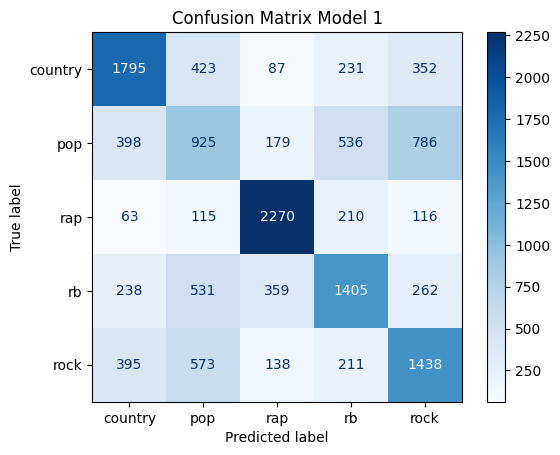

Model 1
Accuracy: 0.5580649757765745
Precision: 0.5517043359141641
Recall: 0.5580649757765745
F1 Score: 0.5541529370885547

Classification Report Model 1:
              precision    recall  f1-score   support

     country       0.62      0.62      0.62      2888
         pop       0.36      0.33      0.34      2824
         rap       0.75      0.82      0.78      2774
          rb       0.54      0.50      0.52      2795
        rock       0.49      0.52      0.50      2755

    accuracy                           0.56     14036
   macro avg       0.55      0.56      0.55     14036
weighted avg       0.55      0.56      0.55     14036



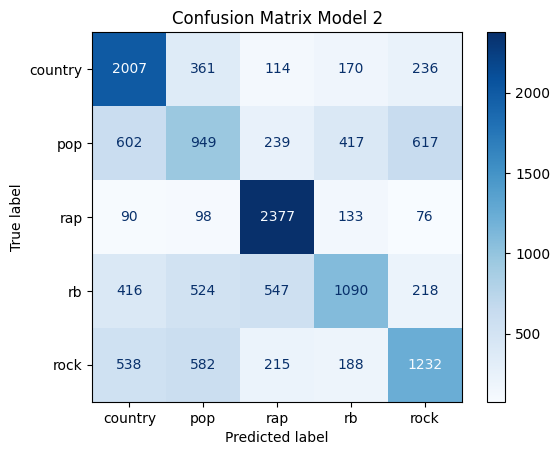

Model 2
Accuracy: 0.5453833000854944
Precision: 0.5338056528260425
Recall: 0.5453833000854944
F1 Score: 0.5325228032275516

Classification Report Model 2:
              precision    recall  f1-score   support

     country       0.55      0.69      0.61      2888
         pop       0.38      0.34      0.36      2824
         rap       0.68      0.86      0.76      2774
          rb       0.55      0.39      0.45      2795
        rock       0.52      0.45      0.48      2755

    accuracy                           0.55     14036
   macro avg       0.53      0.55      0.53     14036
weighted avg       0.53      0.55      0.53     14036



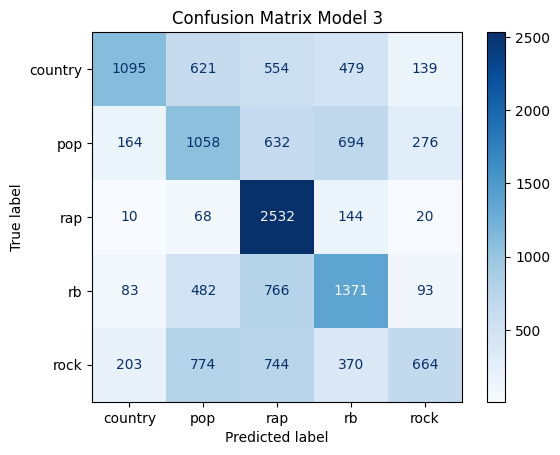

Model 3
Accuracy: 0.4787688800227985
Precision: 0.5101062441091281
Recall: 0.4787688800227985
F1 Score: 0.45888174413445826

Classification Report Model 3:
              precision    recall  f1-score   support

     country       0.70      0.38      0.49      2888
         pop       0.35      0.37      0.36      2824
         rap       0.48      0.91      0.63      2774
          rb       0.45      0.49      0.47      2795
        rock       0.56      0.24      0.34      2755

    accuracy                           0.48     14036
   macro avg       0.51      0.48      0.46     14036
weighted avg       0.51      0.48      0.46     14036



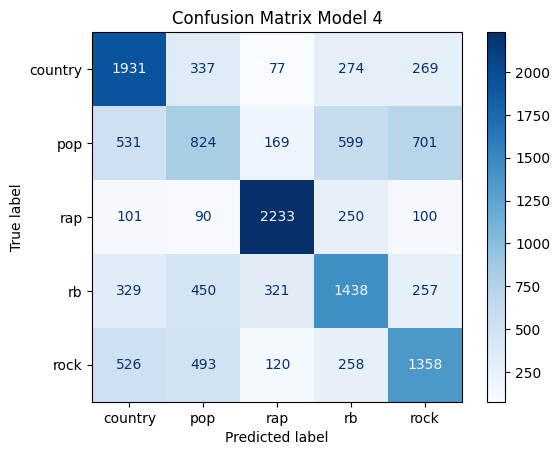

Model 4
Accuracy: 0.554573952693075
Precision: 0.5437942969150809
Recall: 0.554573952693075
F1 Score: 0.54710938303895

Classification Report Model 4:
              precision    recall  f1-score   support

     country       0.56      0.67      0.61      2888
         pop       0.38      0.29      0.33      2824
         rap       0.76      0.80      0.78      2774
          rb       0.51      0.51      0.51      2795
        rock       0.51      0.49      0.50      2755

    accuracy                           0.55     14036
   macro avg       0.54      0.55      0.55     14036
weighted avg       0.54      0.55      0.55     14036



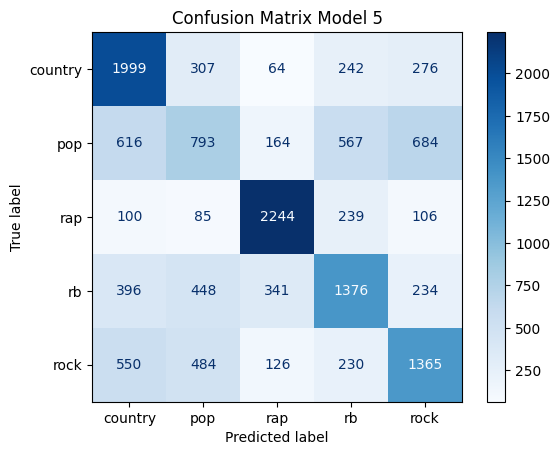

Model 5
Accuracy: 0.5540752351097179
Precision: 0.5423891500156969
Recall: 0.5540752351097179
F1 Score: 0.5448833259234533

Classification Report Model 5:
              precision    recall  f1-score   support

     country       0.55      0.69      0.61      2888
         pop       0.37      0.28      0.32      2824
         rap       0.76      0.81      0.79      2774
          rb       0.52      0.49      0.51      2795
        rock       0.51      0.50      0.50      2755

    accuracy                           0.55     14036
   macro avg       0.54      0.55      0.55     14036
weighted avg       0.54      0.55      0.54     14036



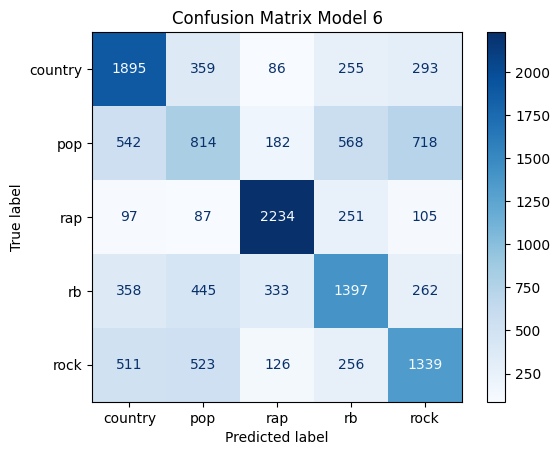

Model 6
Accuracy: 0.5470931889427187
Precision: 0.535939068194737
Recall: 0.5470931889427187
F1 Score: 0.539580931072958

Classification Report Model 6:
              precision    recall  f1-score   support

     country       0.56      0.66      0.60      2888
         pop       0.37      0.29      0.32      2824
         rap       0.75      0.81      0.78      2774
          rb       0.51      0.50      0.51      2795
        rock       0.49      0.49      0.49      2755

    accuracy                           0.55     14036
   macro avg       0.54      0.55      0.54     14036
weighted avg       0.54      0.55      0.54     14036



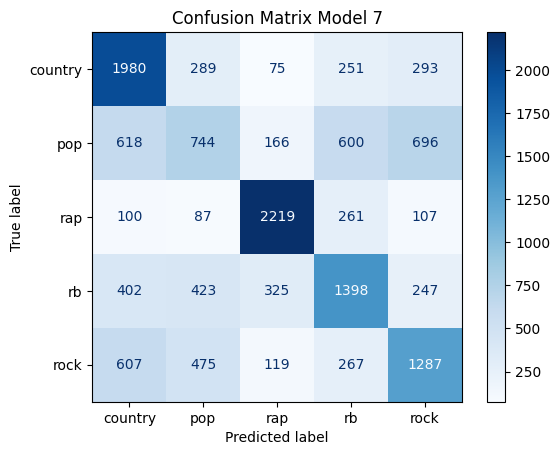

Model 7
Accuracy: 0.5434596751211171
Precision: 0.531391057983828
Recall: 0.5434596751211171
F1 Score: 0.5335954695167006

Classification Report Model 7:
              precision    recall  f1-score   support

     country       0.53      0.69      0.60      2888
         pop       0.37      0.26      0.31      2824
         rap       0.76      0.80      0.78      2774
          rb       0.50      0.50      0.50      2795
        rock       0.49      0.47      0.48      2755

    accuracy                           0.54     14036
   macro avg       0.53      0.54      0.53     14036
weighted avg       0.53      0.54      0.53     14036

Best model on f1: 
NeuralNetwork1(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=300, out_features=300, bias=True)
    (1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=5, bias=True)
  )
)


In [10]:
f1s = []

for i, model in enumerate(models):
    val_predictions = []
    val_targets = []
    
    model.eval()
    
    with torch.no_grad():
        for X_batch, y_batch in val_dataloader:
            outputs = model(X_batch)
            softmax_outputs = nn.functional.softmax(outputs, dim=1)
            _, predicted = torch.max(softmax_outputs, 1)
            val_predictions.extend(predicted.tolist())
            val_targets.extend(y_batch.tolist())

    targets = [genre_names[target] for target in val_targets]
    predictions = [genre_names[prediction] for prediction in val_predictions]

    # Confusion matrix
    cm = confusion_matrix(targets, predictions)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['country', 'pop', 'rap', 'rb', 'rock'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix Model {i+1}')
    plt.show()
    
    # Evaluation metrics
    accuracy = accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions, average='weighted', zero_division=0)
    recall = recall_score(targets, predictions, average='weighted', zero_division=0)
    f1 = f1_score(targets, predictions, average='weighted', zero_division=0)
    f1s.append(f1)
    
    # Print evaluation metrics
    print(f'Model {i+1}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    
    # Classification report
    report = classification_report(targets, predictions, zero_division=0)
    print(f'\nClassification Report Model {i+1}:')
    print(report)

best_on_f1 = models[np.argmax(f1s)]
print(f'Best model on f1: \n{best_on_f1}')

## Final retraining

In [11]:
des_set = pd.concat([train_set, val_set], axis=0)

In [12]:
design_set = LyricsDataset(des_set)
des_dataloader = DataLoader(design_set, batch_size=50000, shuffle=True)

In [13]:
model = NeuralNetwork1(input_dim = 300, output_dim = 5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [14]:
# Training loop
epochs = 140

des_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_x, batch_y in des_dataloader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = loss_fn(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    des_losses.append(running_loss / len(des_dataloader))
    clear_output(wait=True)
    plt.plot(des_losses, label='Training Loss')
    plt.title(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.8f}')
    plt.legend()
    plt.show()

clear_output(wait=True)
print('\n')

with open(f'b_models/final_modelB.pkl', 'wb') as f:
    pickle.dump(model, f)

## Assessment

In [4]:
with open(f'b_models/final_modelB.pkl', 'rb') as f:
    model = pickle.load(f)

In [10]:
test_set = pd.read_csv('test_set.csv')

test_set['tokens'] = test_set['tokens'].apply(json.loads)
test_set['filtered_tokens'] = test_set['filtered_tokens'].apply(json.loads)
test_set['filtered_unique_tokens'] = test_set['filtered_unique_tokens'].apply(json.loads)

# Compute FastText embeddings
test_set['FastText_embedding'] = test_set['filtered_tokens'].mapply(vectorize)
test_set['label'] = test_set['tag'].mapply(lambda x: label[x])

test_set2 = LyricsDataset(test_set)
test_dataloader = DataLoader(test_set2, batch_size=50000, shuffle=True)

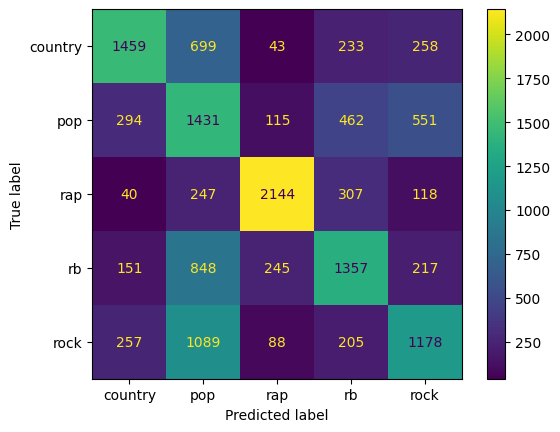

Accuracy: 0.5392561983471075
Precision: 0.568197361539904
Recall: 0.5392561983471075
F1 Score: 0.5476985970079379

Classification Report:
              precision    recall  f1-score   support

     country       0.66      0.54      0.60      2692
         pop       0.33      0.50      0.40      2853
         rap       0.81      0.75      0.78      2856
          rb       0.53      0.48      0.50      2818
        rock       0.51      0.42      0.46      2817

    accuracy                           0.54     14036
   macro avg       0.57      0.54      0.55     14036
weighted avg       0.57      0.54      0.55     14036



In [18]:
test_predictions = []
test_targets = []

model.eval()

with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        outputs = model(X_batch)
        softmax_outputs = nn.functional.softmax(outputs, dim=1)
        _, predicted = torch.max(softmax_outputs, 1)
        test_predictions.extend(predicted.tolist())
        test_targets.extend(y_batch.tolist())

targets = [genre_names[target] for target in test_targets]
predictions = [genre_names[prediction] for prediction in test_predictions]

# Confusion matrix
cm = confusion_matrix(targets, predictions)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['country', 'pop', 'rap', 'rb', 'rock'])
disp.plot()
plt.title(f'')
plt.savefig('final_model_cm.png')
plt.show()


# Evaluation metrics
accuracy = accuracy_score(targets, predictions)
precision = precision_score(targets, predictions, average='weighted', zero_division=0)
recall = recall_score(targets, predictions, average='weighted', zero_division=0)
f1 = f1_score(targets, predictions, average='weighted', zero_division=0)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
    
# Classification report
report = classification_report(targets, predictions, zero_division=0)
print(f'\nClassification Report:')
print(report)

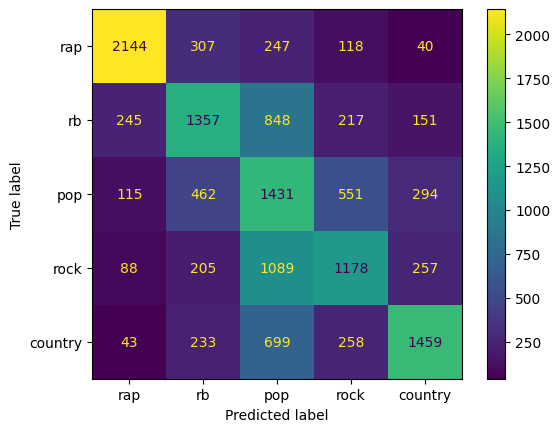

Accuracy: 0.5392561983471075
Precision: 0.568197361539904
Recall: 0.5392561983471075
F1 Score: 0.5476985970079379

Classification Report:
              precision    recall  f1-score   support

     country       0.66      0.54      0.60      2692
         pop       0.33      0.50      0.40      2853
         rap       0.81      0.75      0.78      2856
          rb       0.53      0.48      0.50      2818
        rock       0.51      0.42      0.46      2817

    accuracy                           0.54     14036
   macro avg       0.57      0.54      0.55     14036
weighted avg       0.57      0.54      0.55     14036



In [21]:
test_predictions = []
test_targets = []

model.eval()

with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        outputs = model(X_batch)
        softmax_outputs = nn.functional.softmax(outputs, dim=1)
        _, predicted = torch.max(softmax_outputs, 1)
        test_predictions.extend(predicted.tolist())
        test_targets.extend(y_batch.tolist())

targets = [genre_names[target] for target in test_targets]
predictions = [genre_names[prediction] for prediction in test_predictions]

# Desired order of labels
desired_order = ['rap', 'rb', 'pop', 'rock', 'country']

# Confusion matrix
cm = confusion_matrix(targets, predictions, labels=desired_order)


# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=desired_order)
disp.plot()
plt.title(f'')
plt.savefig('final_model_cm.png')
plt.show()


# Evaluation metrics
accuracy = accuracy_score(targets, predictions)
precision = precision_score(targets, predictions, average='weighted', zero_division=0)
recall = recall_score(targets, predictions, average='weighted', zero_division=0)
f1 = f1_score(targets, predictions, average='weighted', zero_division=0)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
    
# Classification report
report = classification_report(targets, predictions, zero_division=0)
print(f'\nClassification Report:')
print(report)